In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pyrsm as rsm
import statsmodels.api as sm
import statsmodels.formula.api as smf

county_data = pd.read_csv("/home/jovyan/Documents/Rady/MGTA452/Project_dataset.csv")
county_df = pd.DataFrame(county_data)


In [25]:
od_mean_20 = county_df['drug_od_count_2020'].sum() / len(county_df['County'])
od_mean_21 = county_df['drug_od_count_2021'].sum() / len(county_df['County'])
od_mean_22 = county_df['drug_od_count_2022'].sum() / len(county_df['County'])
od_mean_23 = county_df['drug_od_count_2023'].sum() / len(county_df['County'])


od_median_20 = county_df['drug_od_count_2020'].median()
od_median_21 = county_df['drug_od_count_2021'].median()
od_median_22 = county_df['drug_od_count_2022'].median()
od_median_23 = county_df['drug_od_count_2023'].median()

od_max_20 = county_df['drug_od_count_2020'].max()
od_max_21 = county_df['drug_od_count_2021'].max()
od_max_22 = county_df['drug_od_count_2022'].max()
od_max_23 = county_df['drug_od_count_2023'].max()


print(f"2020 Avg Drug ODs: {od_mean_20:.0f}")
print(f"2021 Avg Drug ODs: {od_mean_21:.0f}")
print(f"2022 Avg Drug ODs: {od_mean_22:.0f}")
print(f"2023 Avg Drug ODs: {od_mean_23:.0f}")

print(f"2020 Median Drug ODs: {od_median_20:.0f}")
print(f"2021 Median Drug ODs: {od_median_21:.0f}")
print(f"2022 Median Drug ODs: {od_median_22:.0f}")
print(f"2023 Median Drug ODs: {od_median_23:.0f}")

print(f"2020 Max Drug ODs: {od_max_20:.0f}")
print(f"2021 Max Drug ODs: {od_max_21:.0f}")
print(f"2022 Max Drug ODs: {od_max_22:.0f}")
print(f"2023 Max Drug ODs: {od_max_23:.0f}")


2020 Avg Drug ODs: 27
2021 Avg Drug ODs: 32
2022 Avg Drug ODs: 32
2023 Avg Drug ODs: 31
2020 Median Drug ODs: 6
2021 Median Drug ODs: 7
2022 Median Drug ODs: 7
2023 Median Drug ODs: 7
2020 Max Drug ODs: 1937
2021 Max Drug ODs: 2238
2022 Max Drug ODs: 2345
2023 Max Drug ODs: 2238


Text(0.5, 1.0, 'Distribution of opioid dispensing rates by county (2023)')

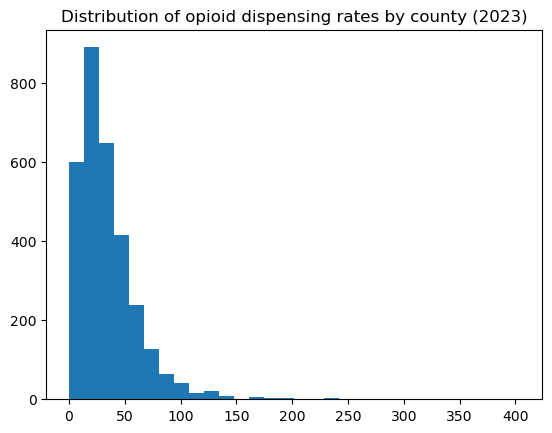

In [26]:
plt.hist(county_df['opioid_dispensing_rate_2023'], bins=30)
plt.title('Distribution of opioid dispensing rates by county (2023)')


Text(0.5, 1.0, 'OD Rate vs unemployment')

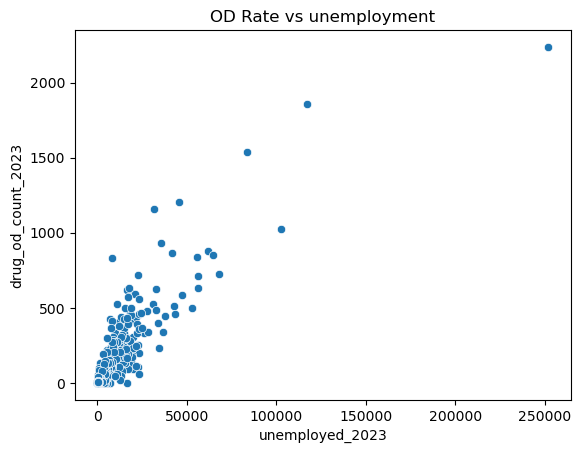

In [27]:
sns.scatterplot(
    x=county_df['unemployed_2023'],
    y=county_df['drug_od_count_2023']
)
plt.title("OD Rate vs unemployment")


Text(0.5, 1.0, 'Distribution of OD rates by county (2023)')

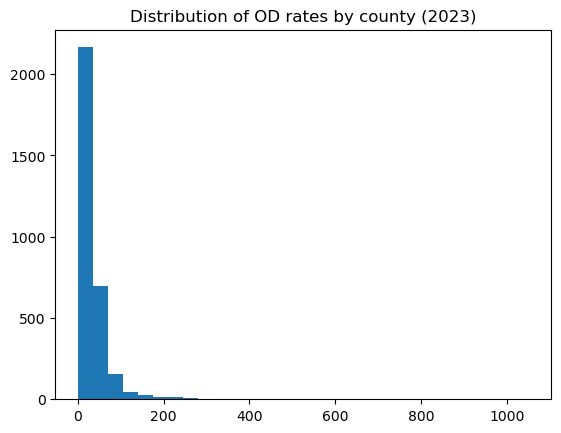

In [28]:
plt.hist(county_df['od_rate_2023_per100k'], bins=30)
plt.title('Distribution of OD rates by county (2023)')

Text(0.5, 1.0, 'SAMSHA Count to OD rate')

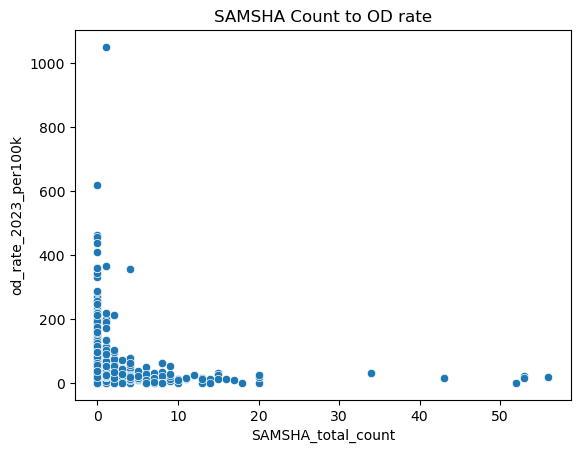

In [29]:
sns.scatterplot(
    x=county_df['SAMSHA_total_count'],
    y=county_df['od_rate_2023_per100k']
)
plt.title("SAMSHA Count to OD rate")


In [30]:
median_income = county_df['median_household_income_2023'].median()

county_df['od_rate_per_100k'] = (county_df['drug_od_count_2023'] / county_df['population_2023']) * 100000

county_df['below_median_income'] = (county_df['median_household_income_2023'] < median_income).astype(int)

below_median = county_df[county_df['below_median_income'] == 1]['od_rate_per_100k']
above_median = county_df[county_df['below_median_income'] == 0]['od_rate_per_100k']


print(f"National Median Income: ${median_income:,.0f}")
print(f"Mean OD rate (below median): {below_median.mean():.2f}")
print(f"Mean OD rate (above median): {above_median.mean():.2f}")


National Median Income: $62,784
Mean OD rate (below median): 37.83
Mean OD rate (above median): 26.49


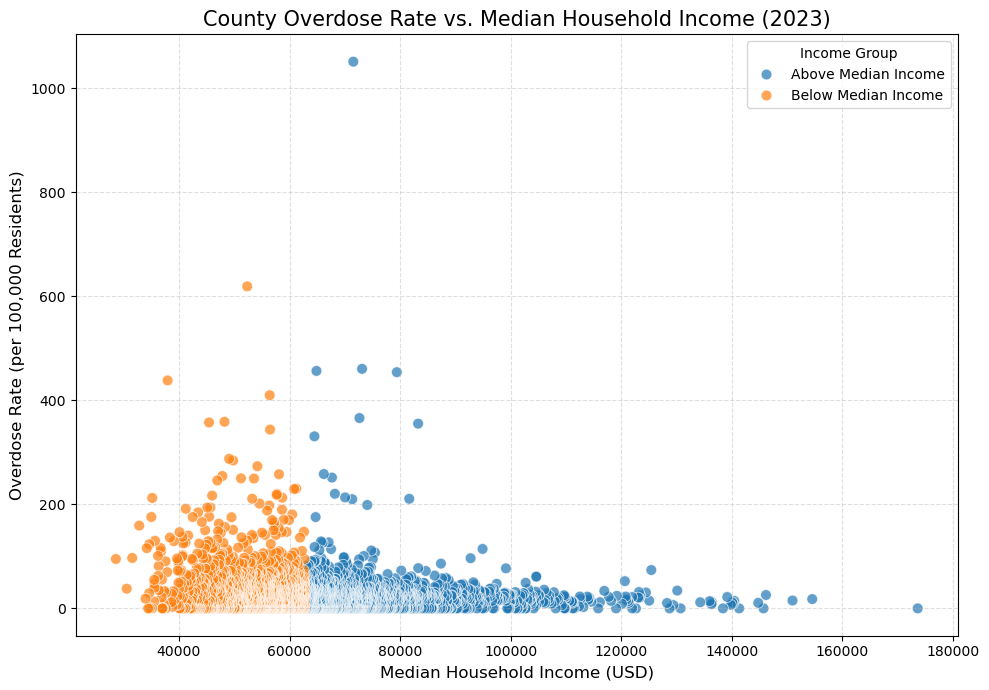

In [31]:
county_df['Income Group'] = county_df['median_household_income_2023'].apply(
    lambda x: 'Below Median Income' if x < median_income else 'Above Median Income'
)

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=county_df,
    x='median_household_income_2023',
    y='od_rate_per_100k',
    hue='Income Group',
    palette={'Below Median Income': '#FF7F0E', 'Above Median Income': '#1F77B4'},
    alpha=0.7,
    edgecolor='white',
    s=60
)

# Titles and labels
plt.title('County Overdose Rate vs. Median Household Income (2023)', fontsize=15)
plt.xlabel('Median Household Income (USD)', fontsize=12)
plt.ylabel('Overdose Rate (per 100,000 Residents)', fontsize=12)
plt.legend(title='Income Group')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [32]:
drug_od_mean_23 = (county_df['drug_od_count_2023']).mean()
drug_od_var_23 = (county_df['drug_od_count_2023']).var()
print(drug_od_mean_23)
print(drug_od_var_23)

31.41945773524721
10768.121063521956


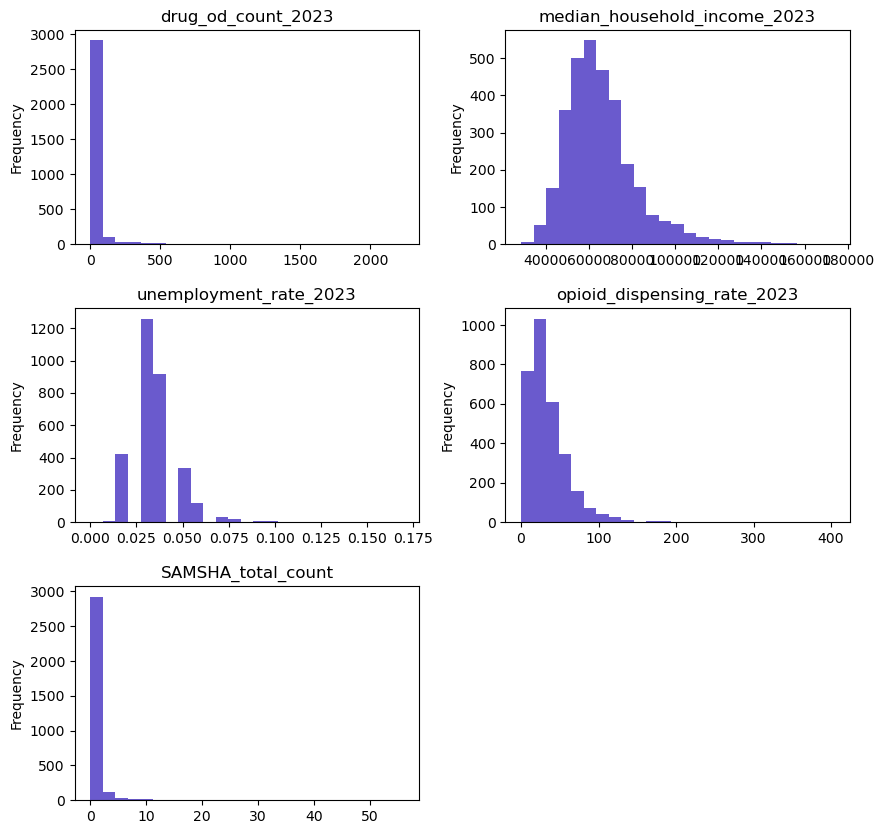

In [33]:
reg = rsm.model.regress(
    {"county_ods": county_df}, rvar="drug_od_count_2023", evar=["median_household_income_2023", "unemployment_rate_2023", "opioid_dispensing_rate_2023", "SAMSHA_total_count"]
)
reg.plot("dist")

In [34]:
reg.summary(vif=True)

Linear regression (OLS)
Data                 : county_ods
Response variable    : drug_od_count_2023
Explanatory variables: median_household_income_2023, unemployment_rate_2023, opioid_dispensing_rate_2023, SAMSHA_total_count
Null hyp.: the effect of x on drug_od_count_2023 is zero
Alt. hyp.: the effect of x on drug_od_count_2023 is not zero

                              coefficient  std.error  t.value p.value     
Intercept                        -139.603     12.496  -11.172  < .001  ***
median_household_income_2023        0.002      0.000   13.144  < .001  ***
unemployment_rate_2023           1035.094    155.118    6.673  < .001  ***
opioid_dispensing_rate_2023         0.392      0.065    5.993  < .001  ***
SAMSHA_total_count                 -1.550      0.813   -1.906   0.057    .

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.072, Adjusted R-squared: 0.071
F-statistic: 59.968 df(4, 3076), p.value < 0.001
Nr obs: 3,081 (54 obs. dropped)

Variance inflat

In [35]:
# Implement Negative Binomial regression to account for skew in OD rate

county_df["log_pop"] = np.log(county_df["population_2023"])

nb_model = smf.glm(
    formula=(
        "drug_od_count_2023 ~ "
        "median_household_income_2023 + "
        "unemployment_rate_2023_perc + "
        "opioid_dispensing_rate_2023 + "
        "SAMSHA_count_per100K"
    ),
    data=county_df,
    family=sm.families.NegativeBinomial(alpha=1.0),
    offset=county_df["log_pop"]
).fit()

print(nb_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:     drug_od_count_2023   No. Observations:                 3081
Model:                            GLM   Df Residuals:                     3076
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10280.
Date:                Tue, 02 Dec 2025   Deviance:                       2870.9
Time:                        10:21:09   Pearson chi2:                 2.77e+03
No. Iterations:                     8   Pseudo R-squ. (CS):            0.05261
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [36]:
# Calculate IRRs to better interpret statistically significant features
# IRR = e^coef

params = nb_model.params
conf   = nb_model.conf_int()

irr = np.exp(params)
irr_ci = np.exp(conf)

irr_table = pd.DataFrame({
    "IRR": irr,
    "CI_lower": irr_ci[0],
    "CI_upper": irr_ci[1],
    "p_value": nb_model.pvalues
})

print(irr_table)

                                   IRR  CI_lower  CI_upper       p_value
Intercept                     0.000514  0.000402  0.000656  0.000000e+00
median_household_income_2023  0.999987  0.999985  0.999990  3.085876e-24
unemployment_rate_2023_perc   1.082001  1.046839  1.118345  2.930994e-06
opioid_dispensing_rate_2023   1.000209  0.998805  1.001614  7.707939e-01
SAMSHA_count_per100K          1.005624  1.001888  1.009373  3.145384e-03


INCOME: 
Each $1 increase in median household income is associated with a 0.0013% decrease in overdose rates. For better interpretability, every $10,000 increase is associated with about a 12.5% lower overdose rate, holding other variables constant.

UNEMPLOYMENT:
Each 1% increase in unemployment results in about an 8.2% increase in OD mortality.

SAMSHA:
Each additional SAMHSA facility per 100k population corresponds to a 0.6% increase in overdose mortality. This isn't causal, it indicates that facilities are allocated to areas with higher needs.

In [37]:
# H0: In counties that fall below the median income, SAMHSA access has no affect on OD rates.
# H1: In counties that fall below the median income, SAMHSA access reduces OD rates.

In [38]:
county_df['log_od_rate_2023_per100k'] = np.log1p(county_df['od_rate_2023_per100k'])

Text(0.5, 1.0, 'Distribution of log OD rates by county (2023)')

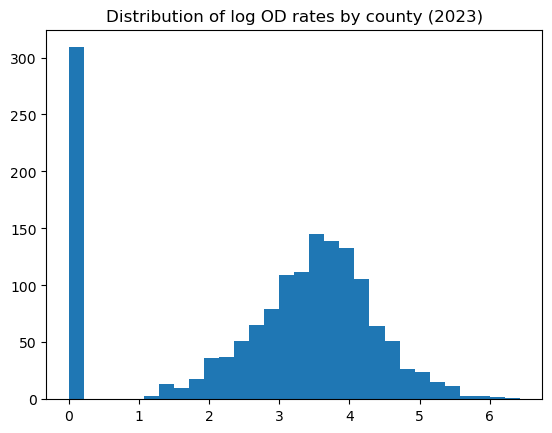

In [39]:
filtered_df = county_df[county_df['median_household_income_2023'] < 62784]

plt.hist(filtered_df['log_od_rate_2023_per100k'], bins=30)
plt.title('Distribution of log OD rates by county (2023)')

In [40]:
filtered_df["log_pop"] = np.log(filtered_df["population_2023"])

nb_model_clinic_access = smf.glm(
    formula=(
        "drug_od_count_2023 ~ "
        "median_household_income_2023 + "
        "unemployment_rate_2023_perc + "
        "opioid_dispensing_rate_2023 + "
        "SAMSHA_Access"
    ),
    data=filtered_df,
    family=sm.families.NegativeBinomial(),
    offset=filtered_df["log_pop"]
).fit()

print(nb_model_clinic_access.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:     drug_od_count_2023   No. Observations:                 1534
Model:                            GLM   Df Residuals:                     1529
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4702.2
Date:                Tue, 02 Dec 2025   Deviance:                       1458.2
Time:                        10:21:09   Pearson chi2:                 1.41e+03
No. Iterations:                     9   Pseudo R-squ. (CS):            0.01888
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

/tmp/ipykernel_83333/588715795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["log_pop"] = np.log(filtered_df["population_2023"])
/opt/conda/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [41]:
# Calculate IRRs to better interpret statistically significant features
# IRR = e^coef

params = nb_model_clinic_access.params
conf   = nb_model_clinic_access.conf_int()

irr = np.exp(params)
irr_ci = np.exp(conf)

irr_table = pd.DataFrame({
    "IRR": irr,
    "CI_lower": irr_ci[0],
    "CI_upper": irr_ci[1],
    "p_value": nb_model_clinic_access.pvalues
})

print(irr_table)

                                   IRR  CI_lower  CI_upper        p_value
Intercept                     0.000917  0.000516  0.001628  6.871356e-126
median_household_income_2023  0.999981  0.999972  0.999990   3.463889e-05
unemployment_rate_2023_perc   1.034380  0.989332  1.081479   1.367905e-01
opioid_dispensing_rate_2023   0.999375  0.997603  1.001151   4.903137e-01
SAMSHA_Access                 0.841362  0.654914  1.080892   1.765694e-01


SUMMARY: 

There is no statistically significant evidence that SAMSHA clinic access lowers OD rates in counties that fall below the median income. 

In [42]:
# H0: Drug OD rates are the same in below median income, and above median income (inclusive) counties.
# H1: Drug OD rates differ in below median income, and above median income (inclusive) counties.

In [43]:
county_df["log_pop"] = np.log(county_df["population_2023"])

nb_model_med_inc = smf.glm(
    formula=(
        "drug_od_count_2023 ~ "
        "unemployment_rate_2023_perc + "
        "opioid_dispensing_rate_2023 + "
        "below_median_inc23"
    ),
    data=county_df,
    family=sm.families.NegativeBinomial(),
    offset=county_df["log_pop"]
).fit()

print(nb_model_med_inc.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:     drug_od_count_2023   No. Observations:                 3081
Model:                            GLM   Df Residuals:                     3077
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10302.
Date:                Tue, 02 Dec 2025   Deviance:                       2915.6
Time:                        10:21:09   Pearson chi2:                 3.17e+03
No. Iterations:                     9   Pseudo R-squ. (CS):            0.03878
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

/opt/conda/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [45]:
# Calculate IRRs to better interpret statistically significant features
# IRR = e^coef

params = nb_model_med_inc.params
conf   = nb_model_med_inc.conf_int()

irr = np.exp(params)
irr_ci = np.exp(conf)

irr_table = pd.DataFrame({
    "IRR": irr,
    "CI_lower": irr_ci[0],
    "CI_upper": irr_ci[1],
    "p_value": nb_model_med_inc.pvalues
})

print(irr_table)

                                  IRR  CI_lower  CI_upper       p_value
Intercept                    0.000180  0.000158  0.000205  0.000000e+00
unemployment_rate_2023_perc  1.101597  1.066076  1.138301  7.203377e-09
opioid_dispensing_rate_2023  1.000315  0.998911  1.001721  6.607065e-01
below_median_inc23           1.373500  1.266572  1.489455  1.658287e-14


SUMMARY: 

We reject H0. Counties that fall below the median income see about a 37% higher drug OD rate compared to counties that are above the median income. 